In [1]:
import seaborn as sns
%matplotlib inline
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp 
import IPython
import sklearn
import mglearn
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train1= pd.read_csv("titanic data/train.csv")
test1= pd.read_csv("titanic data/test.csv")

In [3]:
print (train1.keys())


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(train1.shape)

(891, 12)


In [5]:
train1.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.000,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,NaN,S


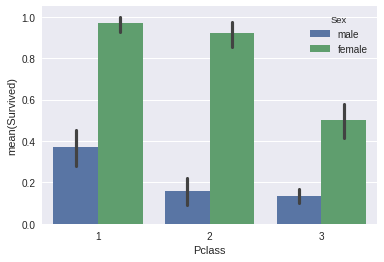

In [6]:
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=train1)

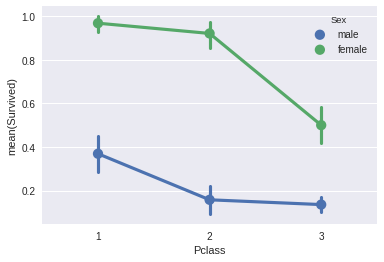

In [7]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train1 )

In [8]:
train1.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [9]:
def age_slots(train1):
    train1.Age=train1.Age.fillna(-0.5)
    bins=(-1,0,5,12,18,25,35,60,120)
    ##group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories=pd.cut(train1.Age,bins)
    train1.Age = categories
    return train1

In [10]:
def cabins_name(train1):
    train1.Cabin = train1.Cabin.fillna('N')
    train1.Cabin = train1.Cabin.apply(lambda x: x[0])
    return train1

def simplify_fares(train1):
    train1.Fare = train1.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(train1.Fare, bins,)
    train1.Fare = categories
    return train1
    
def transform_features(train1):
    train1 = age_slots(train1)
    train1 = cabins_name(train1)
    train1 = simplify_fares(train1)
    return train1


In [11]:
train1 = transform_features(train1)
test1 = transform_features(test1)

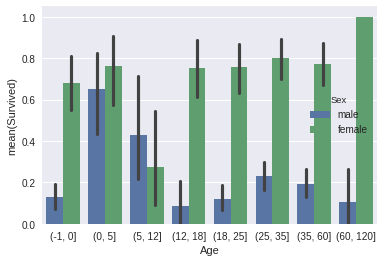

In [12]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=train1)

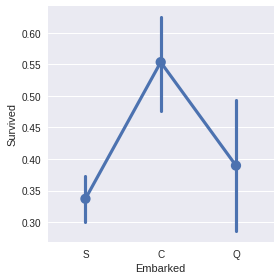

In [14]:
sns.factorplot('Embarked','Survived', data=train1)

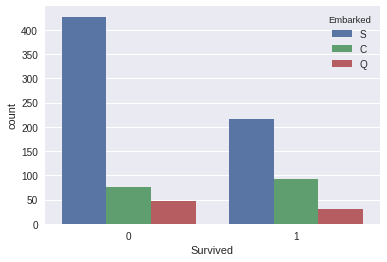

In [15]:
sns.countplot(x='Survived', hue="Embarked", data=train1)

In [20]:
from sklearn.model_selection import train_test_split
X_all = train1.drop(['Survived', 'PassengerId'], axis=1)
y_all = train1['Survived']
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'S'